In [0]:
%tensorflow_version 1.x
import tensorflow as tf
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [11]:
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv
#link to download the CSV file
#line1-------------
from google.colab import files
uploaded = files.upload()
Iris=pd.read_csv("iris.csv")
Iris.head()

Saving iris.csv to iris.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# Iris.shape
print(tf.__version__)

1.15.2


In [13]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
#line2-------------
Iris=Iris[:100]
Iris.shape
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [0]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
#line3-------------------------
Iris.species=pd.Categorical(Iris.species,['setosa','versicolor'],ordered=True)
Iris.species=Iris.species.cat.codes

In [15]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


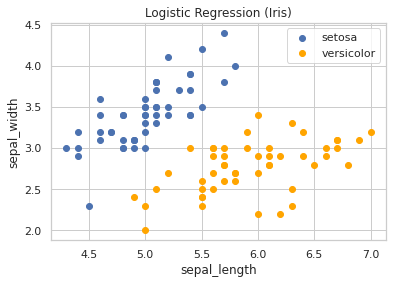

In [16]:
#visualization of given dataset
#codesegment4------------------
X_set, y_set = Iris.iloc[:,[0,1]].values, Iris.iloc[:,-1]
labels=['setosa','versicolor']
from matplotlib.colors import ListedColormap
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('b','orange'))(j), label = labels[i])
plt.title('Logistic Regression (Iris)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc='best')

In [0]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [0]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
#line5-------------
np.random.seed(seed)

#line6-------------
tf.set_random_seed(seed)
#randomnly select 80% of the indices under variable train_index and rest under test_index
#line7-----------------------------------------------
train_index=np.random.choice(100, 80,replace=False)
test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [0]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [0]:
# Define the min-max normalization function
# we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
 def min_max_normalized(data):
   minn=min(data)
   maxx=max(data)
   for i,v in data:
     data[i]=(v-minn)/(maxx-minn)   
#codesegment8------------------


In [0]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
#line9---------------------------- #weights
W = tf.Variable(tf.random.normal((4,1),0,1))
b = tf.Variable(tf.random.normal(shape=[1,1]))
#X_var = tf.placeholder(tf.float32, shape = (None, 4), name = 'X')
#bias
#constructor for random initialization
#line10
init =tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)

In [0]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])#comment on the difference between tf.placeholder and tf.variable-----
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [0]:
# Declare the 'model' you need to learn
#line11-------------------------------------------
mod=tf.matmul(data,W)

In [24]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Define the learning rate， batch_size and number of iterations.
learning_rate=0.1
#line12--------------------------------
#batch_size---- #using batch makes the training ------?
batch_size=30
#line13--------------------------------
#iter_num
iter_num=1500

In [0]:
# Define the optimizer with name opt
#line14-----------------------------
opt=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [0]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework
loss_iter=tf.Variable((iter_num,1))

In [0]:
# Start training model
# Define the variable that stores the result
loss_trace = tf.Variable(['0']*iter_num)
train_acc=tf.Variable(['0']*iter_num)

In [29]:
# training model using mini-batch gradient descent
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(iter_num):
      # Generate random batch_index
      #line15------------------------------ #randomnly picks up up 30 sample data from the train_X
      batch_index = np.random.randint(len(train_X), size = batch_size)
      batch_train_X = train_X[batch_index]
      batch_train_y = np.matrix(train_y[batch_index]).T
      sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
      temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
      #Similarly store train accuracy value for current epoch using sess.run
      #line16---------------------------
      temp_train_acc = sess.run(accuracy,feed_dict={data: batch_train_X, target: batch_train_y})
      # recode the results of loss and train accuracy
      #codesegment17---------------------
      tf.compat.v1.add_to_collection("loss",temp_loss)  
      tf.compat.v1.add_to_collection("acc",temp_train_acc) 
      # output
      if (epoch + 1) % 100 == 0:
          print('epoch: {:4d} loss: {:5f} train_acc: {:5f}'.format(epoch + 1, temp_loss,temp_train_acc))
  
  #Write the command to calculate test accuracy:
  #line18-------------------------------
  batch_test_y=np.matrix(test_y).T
  test_loss=sess.run(loss,feed_dict={data:test_X,target:batch_test_y})
  temp_test_acc=sess.run(accuracy,feed_dict={data:test_X,target:batch_test_y})
  print("The test accuracy is: {:5f}".format(temp_test_acc))
  loss_trace=tf.compat.v1.get_collection("loss")[-1500:]
  train_ac=tf.compat.v1.get_collection("acc")[-1500:]

epoch:  100 loss: 0.054527 train_acc: 1.000000
epoch:  200 loss: 0.029067 train_acc: 1.000000
epoch:  300 loss: 0.024755 train_acc: 1.000000
epoch:  400 loss: 0.014495 train_acc: 1.000000
epoch:  500 loss: 0.012107 train_acc: 1.000000
epoch:  600 loss: 0.015860 train_acc: 1.000000
epoch:  700 loss: 0.009860 train_acc: 1.000000
epoch:  800 loss: 0.007851 train_acc: 1.000000
epoch:  900 loss: 0.008399 train_acc: 1.000000
epoch: 1000 loss: 0.012590 train_acc: 1.000000
epoch: 1100 loss: 0.006034 train_acc: 1.000000
epoch: 1200 loss: 0.008108 train_acc: 1.000000
epoch: 1300 loss: 0.008627 train_acc: 1.000000
epoch: 1400 loss: 0.007115 train_acc: 1.000000
epoch: 1500 loss: 0.002696 train_acc: 1.000000
The test accuracy is: 1.000000


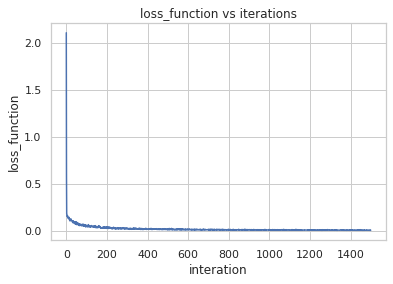

In [32]:
# Visualization of the results
# loss function
#codesegment19------------------------
plt.plot(range(1500),loss_trace)
plt.title('loss_function vs iterations')
plt.xlabel('interation')
plt.ylabel('loss_function')
plt.show()

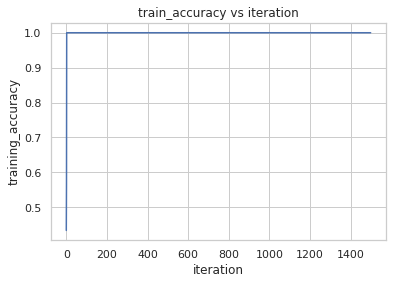

In [33]:
# plot for training accuracy
#codesegment20---------------------------
plt.plot(range(1500),train_ac)
plt.title('train_accuracy vs iteration')
plt.xlabel('iteration')
plt.ylabel('training_accuracy')
plt.show()